# Projet 2 Analysez des données de systèmes éducatifs

Projet 2 du parcours Data Scientist chez Openclassrooms

### Sommaire

* [Analyse exploratoire](#Première-Partie-:-analyse-exploratoire)
    * [Contexte](#Contexte)
    * [Fichiers](#Fichiers)
        * [I. fichier EdStatsCountry](#I.-fichier-EdStatsCountry)
        * [II. Fichier EdStatsCountrySeries](#II.-Fichier-EdStatsCountrySeries)
        * [III.EdStatsData](#III.-EdStatsData)
        * [IV.  fichier EdStatsFootNote](#IV.--fichier-EdStatsFootNote)
        * [V. fichier EdStatsSeries](#V.-fichier-EdStatsSeries)
* [Nettoyage](#Nettoyage)  
    * [Imputation KNN](#Imputation-KNN)
* [Étude de marché](#chapter2)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)

#  Première Partie : analyse exploratoire

## Contexte

Pour la pré-analyse, pourrais-tu :

- Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
- Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

Nous disposons de 5 fichiers csv.

- EdStatsCountry 
- EdStatsCountry-Series
- EdStatsData
- EdStatsFootNote
- EdStatsSeries

Ces fichiers proviennent de la Banque Mondiale.
https://datatopics.worldbank.org/education/indicators

In [103]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style="darkgrid")


## Fichiers 

### I. fichier EdStatsCountry

In [104]:
## I. EdStatsCountry
country = pd.read_csv('EdStatsCountry.csv')
country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

Variables d'intérets : 
- Clés pays :  Country Code 
- Region & Income Group : On cherche des clients potentiels/ des marchés sinificatifs: supprimer les pays low income ?
- IMF data dissemination standard : soit les données du FMI, voir lien suivant https://dsbb.imf.org/
- Latest population census: Pertinant ou non de prendre en compte les données de population.
- Différentes sources industrielles, commerces, accès/qualité eau.
- On a la dernière année d'enquête sur différents thèmes


In [105]:
country['IMF data dissemination standard'].unique()

array([nan, 'General Data Dissemination System (GDDS)',
       'Special Data Dissemination Standard (SDDS)'], dtype=object)

In [106]:
country['System of National Accounts'].unique()

array(['Country uses the 1993 System of National Accounts methodology.',
       'Country uses the 1968 System of National Accounts methodology.',
       nan,
       'Country uses the 2008 System of National Accounts methodology.'],
      dtype=object)

In [107]:
country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [108]:
country.iloc[:,0].nunique()

241

In [109]:
country.iloc[:,1].nunique()

241

In [110]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

le fichier country contient 241 lignes et 32 colonnes 
Country Code n'a pas de doublon.

In [111]:
country.isna().mean().sort_values()

Country Code                                         0.000000
Short Name                                           0.000000
Table Name                                           0.000000
Long Name                                            0.000000
WB-2 code                                            0.004149
2-alpha code                                         0.012448
System of National Accounts                          0.107884
Currency Unit                                        0.107884
Region                                               0.112033
Income Group                                         0.112033
Latest population census                             0.116183
National accounts base year                          0.149378
System of trade                                      0.170124
SNA price valuation                                  0.182573
Latest trade data                                    0.232365
IMF data dissemination standard                      0.248963
Balance 

In [112]:
country.select_dtypes(include=['float64'])

,National accounts reference year,Latest industrial data,Latest trade data,Unnamed: 31
0,NaN,NaN,2012.0,NaN
1,NaN,NaN,2012.0,NaN
2,NaN,NaN,NaN,NaN
3,1996.0,2010.0,2012.0,NaN
4,NaN,NaN,2006.0,NaN
...,...,...,...,...
236,NaN,NaN,NaN,NaN
237,NaN,2006.0,2012.0,NaN
238,NaN,2010.0,2012.0,NaN
239,NaN,NaN,2011.0,NaN


On constate des valeurs manquantes, cependants tous les pays présents ont une identité.

### Région et Income

Il semblerait que des Régions soient des agrégations de pays.

In [113]:
region_na = country[country['Region'].isna()]
region_na.shape

(27, 32)

In [114]:
income_na = country[country['Income Group'].isna()]
income_na.shape

(27, 32)

In [115]:
region_na["Short Name"]

5                                          Arab World
57              East Asia & Pacific (developing only)
58            East Asia & Pacific (all income levels)
59            Europe & Central Asia (developing only)
60          Europe & Central Asia (all income levels)
63                                          Euro area
68                                     European Union
78                                          Gibraltar
89                                        High income
92             Heavily indebted poor countries (HIPC)
116       Latin America & Caribbean (developing only)
122     Latin America & Caribbean (all income levels)
123      Least developed countries: UN classification
124                                        Low income
127                               Lower middle income
128                               Low & middle income
140    Middle East & North Africa (all income levels)
143                                     Middle income
148      Middle East & North

In [116]:
(region_na["Short Name"] == income_na["Short Name"]).count()

27

In [117]:
country.shape 

(241, 32)

In [263]:
region_a_supprimer = region_na["Short Name"] 

country_clean = country[~country['Short Name'].isin(region_a_supprimer)] # On supprime les pays de type aggrégation
country_clean.shape


(214, 32)

On a bien supprimer les 27 lignes correspondants à des aggrégations de pays. On remarque que notre fichier est passé de 241 lignes à 214 lignes.

#### Nombre de pays par classe de revenu

In [264]:
income_group = country_clean["Income Group"].value_counts()
income_group = income_group.to_frame()
income_group

,Income Group
Upper middle income,55
Lower middle income,50
High income: nonOECD,44
Low income,34
High income: OECD,31


[Text(0.5, 1.0, 'Nombre de pays par classe de revenu'), Text(0.5, 0, '')]

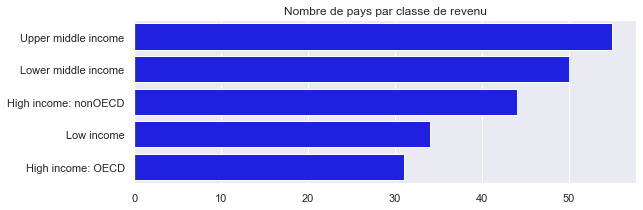

In [120]:
plt.figure(figsize=(9,3))
sns.barplot(
            y=income_group.index,
            x="Income Group",
            data=income_group,
            color = "blue").set(title='Nombre de pays par classe de revenu', xlabel='')
               


#### Nombre de pays par Région du monde

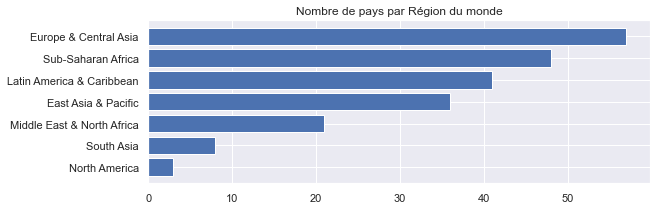

In [265]:
plt.figure(figsize=(9,3))
plt.barh(y = country_clean.groupby('Region')[['Short Name']].count().reset_index().sort_values(by='Short Name')['Region'], width = country.groupby('Region')[['Short Name']].count()['Short Name'].sort_values())
plt.title('Nombre de pays par Région du monde')
plt.grid(True)
plt.show()

#### histogramme des valeurs numériques

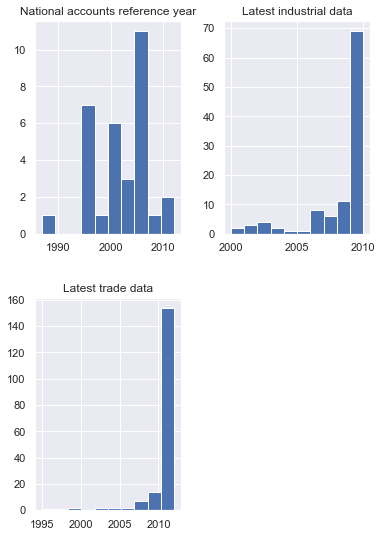

In [266]:
_ = country_clean.drop(columns="Unnamed: 31").hist(figsize=(6,9))

On constate la disparité entre les années d'enquête

### II. Fichier EdStatsCountrySeries

In [123]:
## II. EdStatsCountry-Series
country_series = pd.read_csv('EdStatsCountry-Series.csv')
country_series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [124]:
country_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [125]:
country_series.isna().mean()

CountryCode    0.0
SeriesCode     0.0
DESCRIPTION    0.0
Unnamed: 3     1.0
dtype: float64

In [126]:
country_series.DESCRIPTION.unique()

array(['Data sources : United Nations World Population Prospects',
       'Data sources: United Nations World Population Prospects',
       'Estimates are based on regression.',
       'Data sources : Institute of Statistics, Eurostat',
       'Data sources : Australian Bureau of Statistics',
       'Including Other Territories comprising Jervis Bay Territory, Christmas Island and the Cocos (Keeling) Islands. ',
       'Data sources: Australian Bureau of Statistics',
       'Data sources : Eurostat',
       'Data sources : Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources: Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources : National Statistical Committee of the Republic of Belarus',
       'Data sources: National Statistical Committee of the Republic of Belarus',
       'Data sources : Bermuda Government Department of Statistics',
       'Data sources: Bermuda Government Departme

le fichier country series contient 613 lignes et 4 colonnes. 
C'est un répertoire de sources d'enquêtes associés à chaques pays.

### III. EdStatsData

C'est notre fichier principal avec le plus d'information.

In [127]:
## III. EdStatsData
df = pd.read_csv('EdStatsData.csv')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

df comporte 886930 lignes et 70 colonnes.

In [129]:
df.isna().mean().sort_values()

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
2010              0.726650
                    ...   
1973              0.959924
1971              0.959933
2016              0.981442
2017              0.999839
Unnamed: 69       1.000000
Length: 70, dtype: float64

Les valeurs manquantes sont importantes dans notre fichier df.

In [130]:
liste_pays_unique_country_no_df = df[~df['Country Code'].isin(country['Country Code'])]['Country Code'].nunique()
print("Il y a dans le fichier EdStatsData.csv %d nom de pays qui ne figure pas dans Country.csv" %(liste_pays_unique_country_no_df))

Il y a dans le fichier EdStatsData.csv 1 nom de pays qui ne figure pas dans Country.csv


Inversement ?

In [131]:
liste_pays_unique_df_no_country = country[~country['Country Code'].isin(df['Country Code'])]['Country Code'].nunique()
print("Il y a dans le fichier Country.csv %d nom de pays qui ne figure pas dans EdStatData.csv" %(liste_pays_unique_df_no_country))

Il y a dans le fichier Country.csv 0 nom de pays qui ne figure pas dans EdStatData.csv


In [132]:
temp = df[~df['Country Code'].isin(country['Country Code'])]['Country Code'].unique()
temp

array(['VGB'], dtype=object)

Quoi correspond ce pays ?

In [133]:
df.loc[df["Country Code"]=="VGB"].head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
190580,British Virgin Islands,VGB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### indicateurs à sélectionner ?

In [134]:
df["Indicator Name"].nunique()

3665

In [135]:
list_indicator = df.loc[:,['Indicator Name','Indicator Code']].drop_duplicates()
list_indicator.head()

,Indicator Name,Indicator Code
0,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2
1,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F
2,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI
3,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M
4,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR


In [136]:
list_indicator.tail()

,Indicator Name,Indicator Code
3660,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M
3661,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS
3662,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS
3663,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS
3664,"Youth literacy rate, population 15-24 years, m...",SE.ADT.1524.LT.MA.ZS


Nous devons selectionner à minima 4 indicateurs parmis 3665. On peut s'informer sur le site de la Banque Mondiale.
https://datatopics.worldbank.org/education/indicators


In [137]:
list_indicator[list_indicator["Indicator Name"].str.contains("Internet")] # taux d'accès à internet

,Indicator Name,Indicator Code
1375,Internet users (per 100 people),IT.NET.USER.P2


Taux d'internet pour 100 personnes est un indicateur qui nous intéresse. IT.NET.USER.P2

In [138]:
list_indicator[list_indicator["Indicator Name"].str.contains("computer")] # taux d'odinateur personnel

,Indicator Name,Indicator Code
2084,Personal computers (per 100 people),IT.CMP.PCMP.P2
2102,PIAAC: Adults by proficiency level in problem ...,LO.PIAAC.TEC.NO
2103,PIAAC: Adults by proficiency level in problem ...,LO.PIAAC.TEC.OPT
2139,PIAAC: Female adults by proficiency level in p...,LO.PIAAC.TEC.FE.FAILNO
2154,PIAAC: Male adults by proficiency level in pro...,LO.PIAAC.TEC.MA.FAILNO
2181,PIAAC: Young adults by proficiency level in pr...,LO.PIAAC.TEC.YOU.FAILNO
2182,PIAAC: Young adults by proficiency level in pr...,LO.PIAAC.TEC.YOU.OPT


Taux d'ordinateur personnel pour 100 personnes est un indicateur qui nous intéresse également. IT.CMP.PCMP.P2


In [139]:
list_indicator[list_indicator["Indicator Name"].str.contains("population")] # niveau de population

,Indicator Name,Indicator Code
16,"Adult illiterate population, 15+ years, % female",UIS.LPP.AG15T99
17,"Adult illiterate population, 15+ years, both s...",UIS.LP.AG15T99
18,"Adult illiterate population, 15+ years, female...",UIS.LP.AG15T99.F
19,"Adult illiterate population, 15+ years, male (...",UIS.LP.AG15T99.M
20,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS
...,...,...
3660,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M
3661,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS
3662,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS
3663,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS


In [140]:
list_indicator[list_indicator["Indicator Code"].str.contains("SE.TER.ENRL")] # étudiant du tertiaire (université)

,Indicator Name,Indicator Code
1204,"Enrolment in tertiary education, all programme...",SE.TER.ENRL
1205,"Enrolment in tertiary education, all programme...",SE.TER.ENRL.FE
2050,Percentage of students in tertiary education w...,SE.TER.ENRL.FE.ZS


In [141]:
# UIS.E.3     UIS.E.4
list_indicator[list_indicator["Indicator Code"].str.contains("UIS.E.3")].head(1) # étudiant secondaire

,Indicator Name,Indicator Code
1214,"Enrolment in upper secondary education, both s...",UIS.E.3


In [142]:
list_indicator[list_indicator["Indicator Name"].str.contains("GDP, PPP")] # niveau de richesse

,Indicator Name,Indicator Code
1248,"GDP, PPP (constant 2011 international $)",NY.GDP.MKTP.PP.KD
1249,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD


NY.GDP.MKTP.PP.CD

On identifie les années avec le moins de valeurs manquantes.

In [143]:
df.select_dtypes(include=['float64']).isna().mean().sort_values().head(10)

2010    0.726650
2005    0.792421
2000    0.800801
2012    0.833962
2011    0.835374
2009    0.839775
2006    0.841800
2013    0.844961
2007    0.845228
2008    0.848481
dtype: float64

On regarde les années et indicateurs qui ont le moins de valeurs manquantes pour finaliser notre sélection.

In [144]:
df2 = df[["Indicator Name","Indicator Code","2010","2015","2017"]].groupby(["Indicator Name","Indicator Code"]).apply(lambda x: x.isnull().sum())
df2

,,Indicator Name,Indicator Code,2010,2015,2017
Indicator Name,Indicator Code,,,,,
"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,0,0,136,239,242
"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,0,0,139,239,242
"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,0,0,139,239,242
"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M,0,0,139,239,242
"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,0,0,86,123,242
...,...,...,...,...,...,...
"Youth illiterate population, 15-24 years, male (number)",UIS.LP.AG15T24.M,0,0,182,211,242
"Youth literacy rate, population 15-24 years, both sexes (%)",SE.ADT.1524.LT.ZS,0,0,175,210,242
"Youth literacy rate, population 15-24 years, female (%)",SE.ADT.1524.LT.FE.ZS,0,0,175,210,242


In [145]:
df2.sort_values("2010").head()

,,Indicator Name,Indicator Code,2010,2015,2017
Indicator Name,Indicator Code,,,,,
"Population, total",SP.POP.TOTL,0,0,2,10,242
Population growth (annual %),SP.POP.GROW,0,0,2,10,242
GDP at market prices (current US$),NY.GDP.MKTP.CD,0,0,14,24,242
GDP per capita (current US$),NY.GDP.PCAP.CD,0,0,14,24,242
GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,0,0,15,27,242


In [146]:
df2.sort_values("2015").head()

,,Indicator Name,Indicator Code,2010,2015,2017
Indicator Name,Indicator Code,,,,,
Population growth (annual %),SP.POP.GROW,0,0,2,10,242
"Population, total",SP.POP.TOTL,0,0,2,10,242
Internet users (per 100 people),IT.NET.USER.P2,0,0,15,19,242
GDP at market prices (current US$),NY.GDP.MKTP.CD,0,0,14,24,242
GDP per capita (current US$),NY.GDP.PCAP.CD,0,0,14,24,242


Si les années 2010 et 2015 donnent peut de NA sur les données économiques
L'année 2020  nous offre des données démographique mieux renseigné sur la partie % d'étudiant.

In [147]:
df.loc[df["Indicator Code"]=="UIS.E.3",["Indicator Code","2020"]].isna().mean()

Indicator Code    0.0
2020              1.0
dtype: float64

## Sélection des variables en fonction du taux de remplissage

In [288]:
nos_indicateurs = ["IT.NET.USER.P2", # taux d'accès internet
                   "IT.CMP.PCMP.P2", # taux d'accès à un ordinateur personnel
                   "SE.TER.ENRL", #  étudiant du tertiaire (université)
                   "UIS.E.3", # étudiant secondaire
                   "UIS.E.4", # étudiant post secondaire
                   "SP.POP.TOTL", # population totale
                   "SP.POP.GROW", # croissance démographique 
                   "NY.GDP.MKTP.CD", # Pib prix des marchés
                   "NY.GDP.PCAP.CD"] # pib par tête/habitant

In [289]:
data = df.loc[df["Indicator Code"].isin(nos_indicateurs),:]


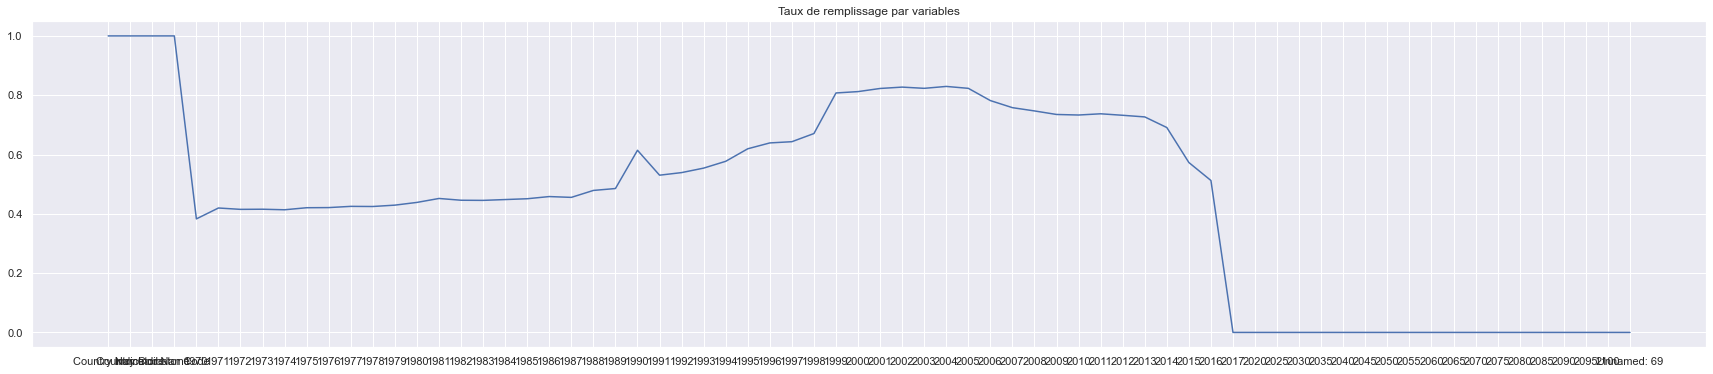

In [290]:
taux_de_remplissage = 1-((data.isna().sum())/data.shape[0])
taux_de_remplissage = taux_de_remplissage.to_frame()
#taux_de_remplissage
plt.figure(figsize=(30,6))
sns.lineplot(x=taux_de_remplissage.index, y=taux_de_remplissage[0], data=taux_de_remplissage).set(title='Taux de remplissage par variables', xlabel='',ylabel='')
plt.show()

On sélectionne des dates pertinantes

In [291]:
nos_variables = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','1985','1990','1995','1998','1999','2000','2010',
       '2015','2016','2017','2020', '2025', '2030', '2035', '2040', '2045',
       '2050']

In [292]:
data = df.loc[df["Indicator Code"].isin(nos_indicateurs),:]
data = data[nos_variables]

In [293]:
data.isna().groupby('Country Name').mean()

,Country Code,Indicator Name,Indicator Code,1985,1990,1995,1998,1999,2000,2010,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050
Country Name,,,,,,,,,,,,,,,,,,,,
False,0.0,0.0,0.0,0.549128,0.385675,0.380624,0.329201,0.192378,0.187787,0.266758,0.426997,0.487603,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [294]:
taux_de_remplissage = 1-((data.isna().sum())/data.shape[0])
taux_de_remplissage = taux_de_remplissage.to_frame()
#taux_de_remplissage

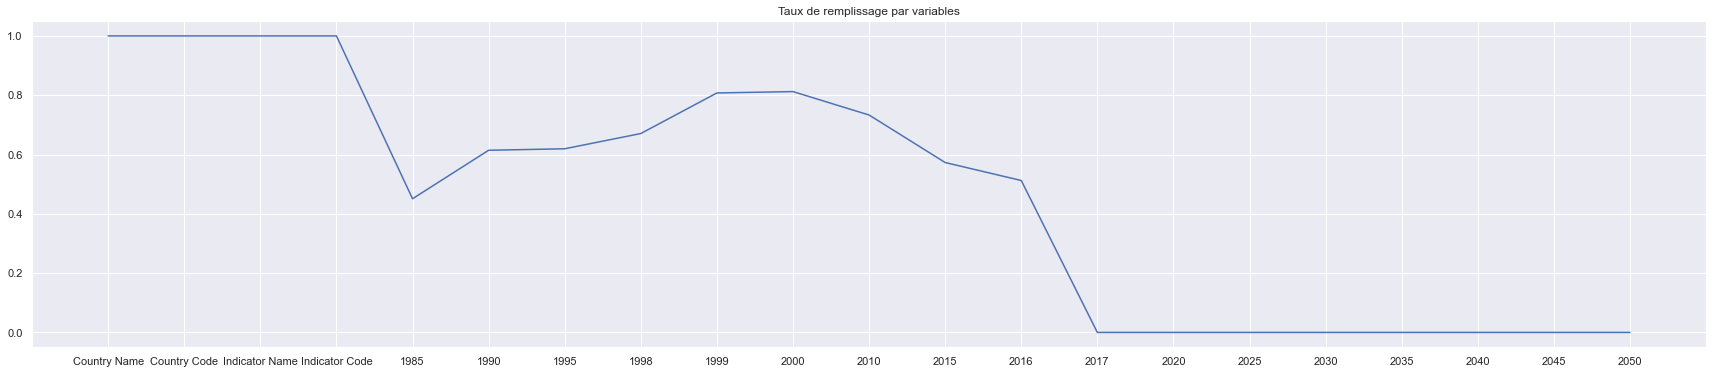

In [295]:
plt.figure(figsize=(30,6))
sns.lineplot(x=taux_de_remplissage.index, y=taux_de_remplissage[0], data=taux_de_remplissage).set(title='Taux de remplissage par variables', xlabel='',ylabel='')
plt.show()

In [299]:
data["Indicator Name"].unique()

array(['Enrolment in post-secondary non-tertiary education, both sexes (number)',
       'Enrolment in tertiary education, all programmes, both sexes (number)',
       'Enrolment in upper secondary education, both sexes (number)',
       'GDP at market prices (current US$)',
       'GDP per capita (current US$)', 'Internet users (per 100 people)',
       'Personal computers (per 100 people)',
       'Population growth (annual %)', 'Population, total'], dtype=object)

Le meilleur taux de remplissage se situe en 2000.\
2015 et 2016 ont un taux de remplissage de 60 % et ont l'avantage d'être plus récente.

###  IV.  fichier EdStatsFootNote 

In [5]:
## IV. EdStatsFootNote
footnote = pd.read_csv('EdStatsFootNote.csv')
footnote.head(3)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN


In [50]:
footnote.CountryCode.nunique()

239

In [51]:
footnote.columns.nunique()

5

In [3]:
footnote.isna().sum()

CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
Unnamed: 4     643638
dtype: int64

In [4]:
footnote.isna().mean()

CountryCode    0.0
SeriesCode     0.0
Year           0.0
DESCRIPTION    0.0
Unnamed: 4     1.0
dtype: float64

On supprimme la colonne 'Unnamed: 4' composée exclusivement de valeurs manquantes

In [87]:
footnote.drop('Unnamed: 4', axis=1, inplace = True)

In [88]:
footnote.head(1)

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.


In [80]:
footnote.Year.unique()

array(['YR2001', 'YR2005', 'YR2000', 'YR2004', 'YR2006', 'YR2003',
       'YR1999', 'YR2008', 'YR2002', 'YR2007', 'YR2017', 'YR2010',
       'YR2009', 'YR2011', 'YR2012', 'YR2015', 'YR2014', 'YR1970',
       'YR1971', 'YR1972', 'YR1973', 'YR1974', 'YR1975', 'YR1976',
       'YR1977', 'YR1978', 'YR1979', 'YR1980', 'YR1981', 'YR1982',
       'YR1983', 'YR1984', 'YR1985', 'YR1986', 'YR1987', 'YR1988',
       'YR1989', 'YR1990', 'YR1991', 'YR1992', 'YR1993', 'YR1994',
       'YR1995', 'YR1996', 'YR1997', 'YR1998', 'YR2013', 'YR2016',
       'YR2020', 'YR2025', 'YR2030', 'YR2035', 'YR2040', 'YR2045',
       'YR2050', 'yr2012'], dtype=object)

In [78]:
footnote.Year.nunique()

56

In [76]:
footnote.SeriesCode.unique()

array(['SE.PRE.ENRL.FE', 'SE.TER.TCHR.FE', 'SE.PRE.TCHR.FE', ...,
       'UIS.AFR.GTCTR.2.F', 'UIS.AFR.GTCTR.2.M', 'UIS.AFR.GTCTR.2.T'],
      dtype=object)

In [77]:
footnote.DESCRIPTION.unique()

array(['Country estimation.', 'UIS Estimation',
       'UNESCO Institute for Statistics (UIS) estimate', ...,
       'Uncertainty bound is 91.6 - 109.3',
       'Uncertainty bound is 54.3 - 76',
       'Uncertainty bound is 48.3 - 73.3'], dtype=object)

In [92]:
footnote.groupby(['Year','CountryCode']).count()

SeriesCode  DESCRIPTION
Year   CountryCode                         
YR1970 ABW                   5            5
       AFG                  45           45
       AGO                   5            5
       ALB                   5            5
       AND                   4            4
...                        ...          ...
yr2012 MNA                   1            1
       SAS                   1            1
       SSA                   1            1
       UMC                   1            1
       WLD                   1            1

[11234 rows x 2 columns]

In [91]:
footnote.groupby(['Year','CountryCode']).count().sort_values(by = 'SeriesCode', ascending = False)

SeriesCode  DESCRIPTION
Year   CountryCode                         
YR2004 TTO                 489          489
YR2005 LBN                 421          421
YR2004 LBN                 420          420
YR2002 LBN                 414          414
YR2003 LBN                 402          402
...                        ...          ...
YR2016 LCN                   1            1
YR2014 TON                   1            1
       TLS                   1            1
       TCA                   1            1
yr2012 WLD                   1            1

[11234 rows x 2 columns]

In [93]:
footnote.groupby(['Year','CountryCode']).count().sort_values(by = 'SeriesCode', ascending = False).describe()

,SeriesCode,DESCRIPTION
count,11234.000000,11234.000000
mean,57.293751,57.293751
std,54.431511,54.431511
min,1.000000,1.000000
25%,16.000000,16.000000
50%,44.000000,44.000000
75%,79.000000,79.000000
max,489.000000,489.000000


In [44]:
footnote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [15]:
footnote.groupby("CountryCode")["Year"].count().sort_values(ascending=False).to_frame()

,Year
CountryCode,
LIC,7320
CYP,7183
LDC,6481
SSA,6389
SSF,6336
...,...
IMN,32
CUW,23
XKX,12


### V. fichier EdStatsSeries

In [94]:
## V. EdStatsSeries
series = pd.read_csv('EdStatsSeries.csv')
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

<AxesSubplot:>

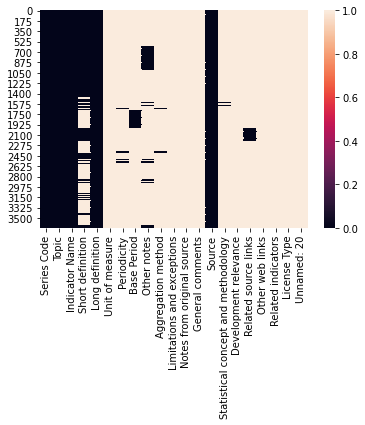

In [97]:
sns.heatmap(series.isna())

In [105]:
# On check notre graphique 
series.isna().mean().sort_values()

Series Code                            0.000000
Topic                                  0.000000
Indicator Name                         0.000000
Long definition                        0.000000
Source                                 0.000000
Short definition                       0.411733
Other notes                            0.849386
Base Period                            0.914325
Related source links                   0.941337
Periodicity                            0.972988
Aggregation method                     0.987176
Statistical concept and methodology    0.993724
Limitations and exceptions             0.996180
General comments                       0.996180
Development relevance                  0.999181
Notes from original source             1.000000
License Type                           1.000000
Unit of measure                        1.000000
Other web links                        1.000000
Related indicators                     1.000000
Unnamed: 20                            1

In [101]:
series.tail(5)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Secondary,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3664,XGDP.56.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in tertiary institution...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Tertiary,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
# On conserve uniquement les variables avec des données
series = series.loc[:,['Series Code','Topic','Indicator Name','Source']]
series

,Series Code,Topic,Indicator Name,Source
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Robert J. Barro and Jong-Wha Lee: http://www.b...
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Robert J. Barro and Jong-Wha Lee: http://www.b...
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Robert J. Barro and Jong-Wha Lee: http://www.b...
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Robert J. Barro and Jong-Wha Lee: http://www.b...
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Robert J. Barro and Jong-Wha Lee: http://www.b...
...,...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,UNESCO Institute for Statistics
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,UNESCO Institute for Statistics
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,UNESCO Institute for Statistics
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,UNESCO Institute for Statistics


In [111]:
series.Source.unique()

array(['Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/',
       'Demographic and Health Surveys (DHS)',
       'World Bank staff calculations based on Multiple Indicator Cluster Survey (MICS) data',
       'Multiple Indicator Cluster Surveys (MICS)',
       'International Telecommunication Union, World Telecommunication/ICT Development Report and database.',
       'Early Grade Reading Assessment (EGRA): https://www.eddataglobal.org/reading/',
       'Latin American Laboratory for Assessment of the Quality of Education (LLECE)',
       "Programme d'Analyse des Systèmes Educatifs de la CONFEMEN/Program for the Analysis of CONFEMEN Education Systems (PASEC): http://www.pasec.confemen.org/",
       'OECD Programme for the International Assessment of Adult Competencies (PIAAC)',
       'International Association for the Evaluation of Educational Achievement (IEA) Progress in International Reading Literacy Study (PIRLS)',
       'OECD Programme for International Student Assessme

Ce dernier fichier semble être un recueil de sources académiques/conférences
Définitions de variables ?

In [123]:
series['Series Code'].nunique()

3665

In [125]:
series['Indicator Name'].unique()
# source : http://barrolee.com/

array(['Barro-Lee: Percentage of female population age 15-19 with no education',
       'Barro-Lee: Percentage of population age 15-19 with no education',
       'Barro-Lee: Percentage of female population age 15+ with no education',
       ..., 'Government expenditure per tertiary student (constant US$)',
       'Government expenditure in secondary institutions education as % of GDP (%)',
       'Government expenditure in tertiary institutions as % of GDP (%)'],
      dtype=object)

# Nettoyage

On va joindre notre fichier principale avec le fichier country_clean: lea agrégats de pays sont supprimés.\
On conserve par ligne des pays.\
Sélectionner les pays pertinants.\
On conserve les dates avec le plus d'informations.


In [300]:
country_clean_select = country_clean[["Country Code","Region","Income Group"]]

data_select = data[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','1990',
       '1995', '1998', '1999', '2000', '2010', '2015', '2016']]

In [301]:
dt = pd.merge(country_clean_select,data_select,how='left')
dt.head()

,Country Code,Region,Income Group,Country Name,Indicator Name,Indicator Code,1990,1995,1998,1999,2000,2010,2015,2016
0,ABW,Latin America & Caribbean,High income: nonOECD,Aruba,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,NaN,NaN,NaN,2.400000e+01,1.240000e+02,NaN,NaN,NaN
1,ABW,Latin America & Caribbean,High income: nonOECD,Aruba,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,NaN,NaN,1.446000e+03,1.578000e+03,2.330000e+03,1166.0,NaN
2,ABW,Latin America & Caribbean,High income: nonOECD,Aruba,"Enrolment in upper secondary education, both s...",UIS.E.3,NaN,NaN,NaN,3.258000e+03,3.119000e+03,3.913000e+03,NaN,NaN
3,ABW,Latin America & Caribbean,High income: nonOECD,Aruba,GDP at market prices (current US$),NY.GDP.MKTP.CD,NaN,1.320670e+09,1.665363e+09,1.722799e+09,1.873453e+09,2.467704e+09,NaN,NaN
4,ABW,Latin America & Caribbean,High income: nonOECD,Aruba,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,1.644179e+04,1.908135e+04,1.935620e+04,2.062070e+04,2.427194e+04,NaN,NaN


In [302]:
dt.groupby('Indicator Name').count()

,Country Code,Region,Income Group,Country Name,Indicator Code,1990,1995,1998,1999,2000,2010,2015,2016
Indicator Name,,,,,,,,,,,,,
"Enrolment in post-secondary non-tertiary education, both sexes (number)",214,214,214,214,214,0,0,0,79,85,70,2,0
"Enrolment in tertiary education, all programmes, both sexes (number)",214,214,214,214,214,123,110,86,132,123,140,109,7
"Enrolment in upper secondary education, both sexes (number)",214,214,214,214,214,0,0,0,149,147,149,7,0
GDP at market prices (current US$),214,214,214,214,214,179,192,194,195,199,203,196,189
GDP per capita (current US$),214,214,214,214,214,179,192,194,195,199,203,196,189
Internet users (per 100 people),214,214,214,214,214,205,138,186,193,195,201,201,200
Personal computers (per 100 people),214,214,214,214,214,61,109,150,157,161,0,0,0
Population growth (annual %),214,214,214,214,214,211,211,212,214,214,214,209,209
"Population, total",214,214,214,214,214,212,212,214,214,214,214,209,209


In [329]:
dt2 = dt.loc[:,'1990':'2016']
row_indices = dt2.index
column_names = dt2.columns
dt2.head(3)

,1990,1995,1998,1999,2000,2010,2015,2016
0,NaN,NaN,NaN,24.0,124.0,NaN,NaN,NaN
1,NaN,NaN,NaN,1446.0,1578.0,2330.0,1166.0,NaN
2,NaN,NaN,NaN,3258.0,3119.0,3913.0,NaN,NaN


## Imputation KNN

In [308]:
# import the KNNimputer class
from sklearn.impute import KNNImputer

In [330]:
imputer = KNNImputer(n_neighbors=3, weights="uniform")
array_impute = imputer.fit_transform(dt2)
array_impute

array([[2.99673955e+00, 2.02329632e+01, 2.89376559e+01, ...,
        2.95166667e+01, 4.13986113e+01, 4.34759540e+01],
       [8.95175112e+02, 7.58384418e+02, 1.03192459e+03, ...,
        2.33000000e+03, 1.16600000e+03, 1.70692874e+03],
       [4.79801433e+03, 2.41745480e+03, 2.87525308e+03, ...,
        3.91300000e+03, 1.04476116e+04, 4.74430429e+03],
       ...,
       [1.91172020e-02, 2.83520646e-01, 1.06300339e+00, ...,
        3.16666667e+00, 1.61600000e+01, 1.90239920e+01],
       [2.79394702e+00, 1.81308470e+00, 1.55299407e+00, ...,
        1.97675598e+00, 2.34564297e+00, 2.33606955e+00],
       [1.01831130e+07, 1.13203460e+07, 1.18932720e+07, ...,
        1.40863170e+07, 1.57774510e+07, 1.61503620e+07]])

In [331]:
dt_impute = pd.DataFrame(array_impute, index=row_indices, columns=column_names) # Transformation en df 
dt_impute

,1990,1995,1998,1999,2000,2010,2015,2016
0,2.996740e+00,2.023296e+01,2.893766e+01,2.400000e+01,1.240000e+02,2.951667e+01,4.139861e+01,4.347595e+01
1,8.951751e+02,7.583844e+02,1.031925e+03,1.446000e+03,1.578000e+03,2.330000e+03,1.166000e+03,1.706929e+03
2,4.798014e+03,2.417455e+03,2.875253e+03,3.258000e+03,3.119000e+03,3.913000e+03,1.044761e+04,4.744304e+03
3,1.328141e+09,1.320670e+09,1.665363e+09,1.722799e+09,1.873453e+09,2.467704e+09,3.566374e+09,3.987382e+09
4,1.336571e+04,1.644179e+04,1.908135e+04,1.935620e+04,2.062070e+04,2.427194e+04,2.867845e+04,2.915474e+04
...,...,...,...,...,...,...,...,...
1921,8.625866e+02,6.281849e+02,5.382849e+02,5.684440e+02,5.473589e+02,7.199795e+02,1.033416e+03,1.029077e+03
1922,0.000000e+00,7.683540e-03,8.164848e-02,1.616755e-01,4.014335e-01,6.400000e+00,2.274282e+01,2.311999e+01
1923,1.911720e-02,2.835206e-01,1.063003e+00,1.211169e+00,1.559544e+00,3.166667e+00,1.616000e+01,1.902399e+01
1924,2.793947e+00,1.813085e+00,1.552994e+00,1.429746e+00,1.298782e+00,1.976756e+00,2.345643e+00,2.336070e+00


In [342]:
temp = dt
temp.loc[:,"1990":"2016"] = dt_impute
temp.head()

,Country Code,Region,Income Group,Country Name,Indicator Name,Indicator Code,1990,1995,1998,1999,2000,2010,2015,2016
0,ABW,Latin America & Caribbean,High income: nonOECD,Aruba,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,2.996740e+00,2.023296e+01,2.893766e+01,2.400000e+01,1.240000e+02,2.951667e+01,4.139861e+01,4.347595e+01
1,ABW,Latin America & Caribbean,High income: nonOECD,Aruba,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,8.951751e+02,7.583844e+02,1.031925e+03,1.446000e+03,1.578000e+03,2.330000e+03,1.166000e+03,1.706929e+03
2,ABW,Latin America & Caribbean,High income: nonOECD,Aruba,"Enrolment in upper secondary education, both s...",UIS.E.3,4.798014e+03,2.417455e+03,2.875253e+03,3.258000e+03,3.119000e+03,3.913000e+03,1.044761e+04,4.744304e+03
3,ABW,Latin America & Caribbean,High income: nonOECD,Aruba,GDP at market prices (current US$),NY.GDP.MKTP.CD,1.328141e+09,1.320670e+09,1.665363e+09,1.722799e+09,1.873453e+09,2.467704e+09,3.566374e+09,3.987382e+09
4,ABW,Latin America & Caribbean,High income: nonOECD,Aruba,GDP per capita (current US$),NY.GDP.PCAP.CD,1.336571e+04,1.644179e+04,1.908135e+04,1.935620e+04,2.062070e+04,2.427194e+04,2.867845e+04,2.915474e+04


A faire:
- Normaliser avec SK learn scaler()
- Mettre à jour commentaire, mise en page
- K-means ? regression linéaire ? Z score ?